# **Descriptive Analysis:**

In [53]:
# Import libraries:

import pandas as pd
import numpy as np

In [54]:
# Load dataset:

Sales_df = pd.read_csv('/content/sales_data.csv')

Sales_df

,Order_ID,Customer_ID,Order_Date,Product_Category,Quantity,Price_Per_Unit,Total_Sales,Region,Customer_Segment
0,1,1038,2024-01-01,Electronics,5,122.790781,613.953907,East,New
1,2,1028,2024-01-02,Electronics,1,254.604756,254.604756,North,New
2,3,1014,2024-01-03,Furniture,1,290.282058,290.282058,South,New
3,4,1042,2024-01-04,Groceries,3,386.591467,1159.774401,South,New
4,5,1007,2024-01-05,Groceries,2,31.365848,62.731696,South,Returning
...,...,...,...,...,...,...,...,...,...
95,96,1014,2024-04-05,Groceries,5,287.358233,1436.791166,North,New
96,97,1044,2024-04-06,Electronics,1,87.736759,87.736759,East,New
97,98,1000,2024-04-07,Clothing,4,68.880677,275.522710,North,Returning
98,99,1024,2024-04-08,Clothing,1,177.521037,177.521037,West,VIP


In [55]:
Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          100 non-null    int64  
 1   Customer_ID       100 non-null    int64  
 2   Order_Date        100 non-null    object 
 3   Product_Category  100 non-null    object 
 4   Quantity          100 non-null    int64  
 5   Price_Per_Unit    100 non-null    float64
 6   Total_Sales       100 non-null    float64
 7   Region            100 non-null    object 
 8   Customer_Segment  100 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 7.2+ KB


In [56]:
Sales_df.isnull().sum()

,0
Order_ID,0
Customer_ID,0
Order_Date,0
Product_Category,0
Quantity,0
Price_Per_Unit,0
Total_Sales,0
Region,0
Customer_Segment,0


In [57]:
Sales_df['Product_Category'].unique()

array(['Electronics', 'Furniture', 'Groceries', 'Books', 'Clothing'],
      dtype=object)

In [58]:
# Convert 'Order_Date' column to datetime

Sales_df['Order_Date'] = pd.to_datetime(Sales_df['Order_Date'])

Sales_df

,Order_ID,Customer_ID,Order_Date,Product_Category,Quantity,Price_Per_Unit,Total_Sales,Region,Customer_Segment
0,1,1038,2024-01-01,Electronics,5,122.790781,613.953907,East,New
1,2,1028,2024-01-02,Electronics,1,254.604756,254.604756,North,New
2,3,1014,2024-01-03,Furniture,1,290.282058,290.282058,South,New
3,4,1042,2024-01-04,Groceries,3,386.591467,1159.774401,South,New
4,5,1007,2024-01-05,Groceries,2,31.365848,62.731696,South,Returning
...,...,...,...,...,...,...,...,...,...
95,96,1014,2024-04-05,Groceries,5,287.358233,1436.791166,North,New
96,97,1044,2024-04-06,Electronics,1,87.736759,87.736759,East,New
97,98,1000,2024-04-07,Clothing,4,68.880677,275.522710,North,Returning
98,99,1024,2024-04-08,Clothing,1,177.521037,177.521037,West,VIP


In [59]:
# Filtered data for the past two years (2023 and 2024)

filtered_data = Sales_df[Sales_df['Order_Date'] >= '2023-01-01']

filtered_data

,Order_ID,Customer_ID,Order_Date,Product_Category,Quantity,Price_Per_Unit,Total_Sales,Region,Customer_Segment
0,1,1038,2024-01-01,Electronics,5,122.790781,613.953907,East,New
1,2,1028,2024-01-02,Electronics,1,254.604756,254.604756,North,New
2,3,1014,2024-01-03,Furniture,1,290.282058,290.282058,South,New
3,4,1042,2024-01-04,Groceries,3,386.591467,1159.774401,South,New
4,5,1007,2024-01-05,Groceries,2,31.365848,62.731696,South,Returning
...,...,...,...,...,...,...,...,...,...
95,96,1014,2024-04-05,Groceries,5,287.358233,1436.791166,North,New
96,97,1044,2024-04-06,Electronics,1,87.736759,87.736759,East,New
97,98,1000,2024-04-07,Clothing,4,68.880677,275.522710,North,Returning
98,99,1024,2024-04-08,Clothing,1,177.521037,177.521037,West,VIP


In [60]:
# Summarize sales performance metrics

total_sales = filtered_data['Total_Sales'].sum()

average_order_value = filtered_data['Total_Sales'].mean()

customer_acquisition = filtered_data['Customer_ID'].nunique()

category_performance = filtered_data.groupby('Product_Category')['Total_Sales'].sum()

sales_metrics = {

    "Total Sales (2023-2024)": total_sales,

    "Average Order Value": average_order_value,

    "Unique Customers Acquired": customer_acquisition,

    "Sales by Product Category": category_performance.to_dict()

}

In [61]:
sales_metrics

{'Total Sales (2023-2024)': 67055.70218449691,
 'Average Order Value': 670.5570218449691,
 'Unique Customers Acquired': 46,
 'Sales by Product Category': {'Books': 12806.643951744993,
  'Clothing': 6483.400176424759,
  'Electronics': 17170.386908376186,
  'Furniture': 13508.411569985625,
  'Groceries': 17086.859577965348}}

# **Trend Analysis:**

In [62]:
# Extract additional time-related information

filtered_data['Month'] = filtered_data['Order_Date'].dt.to_period('M')

filtered_data['Quarter'] = filtered_data['Order_Date'].dt.to_period('Q')

In [63]:
# Monthly sales trends

monthly_sales = filtered_data.groupby('Month')['Total_Sales'].sum()

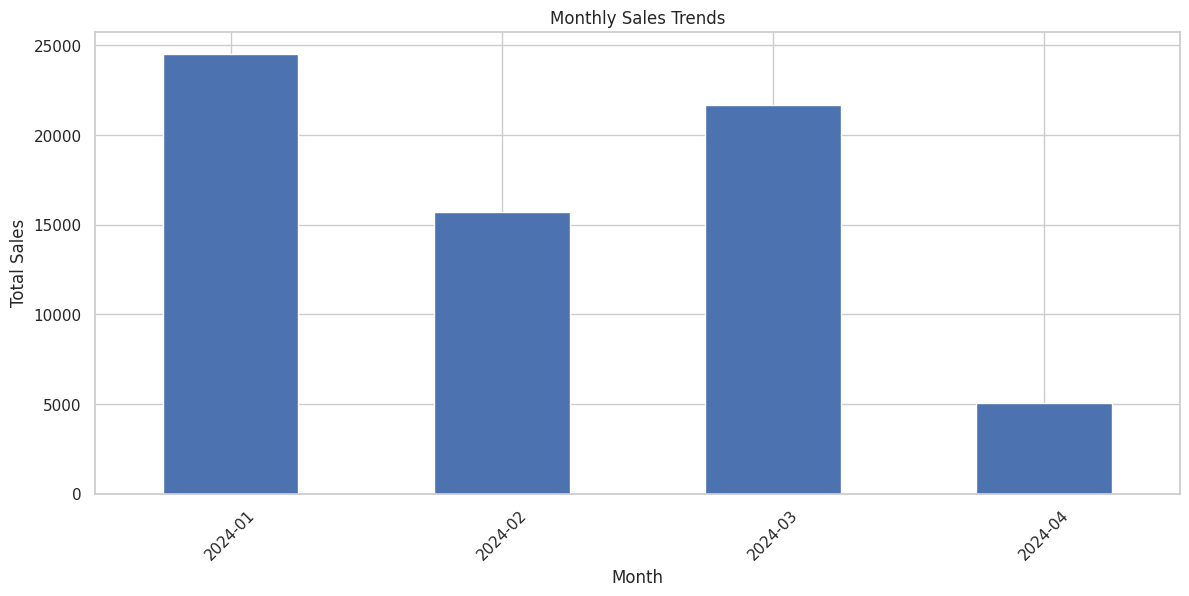

In [64]:
# Monthly sales trends plot.

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [65]:
# Quarterly sales trends

quarterly_sales = filtered_data.groupby('Quarter')['Total_Sales'].sum()

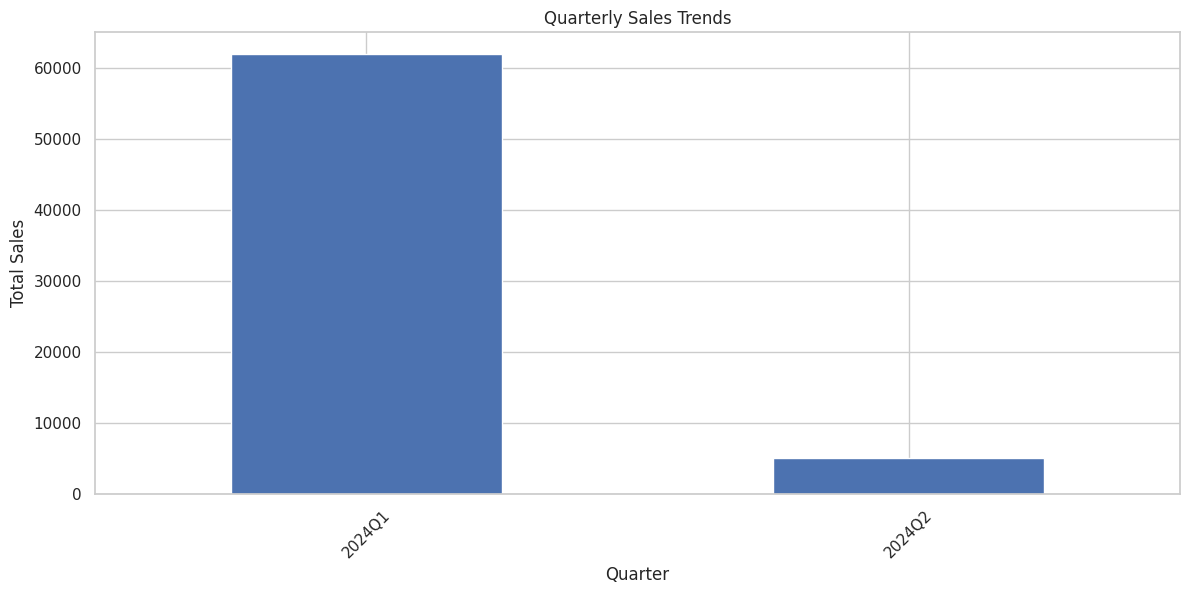

In [66]:
# Quarterly Sales Trends plot.

plt.figure(figsize=(14, 6))
quarterly_sales.plot(kind='bar')
#plt.plot(quarterly_sales.index, quarterly_sales.values)
plt.title('Quarterly Sales Trends')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [67]:
# Regional sales trends

regional_sales = filtered_data.groupby('Region')['Total_Sales'].sum()

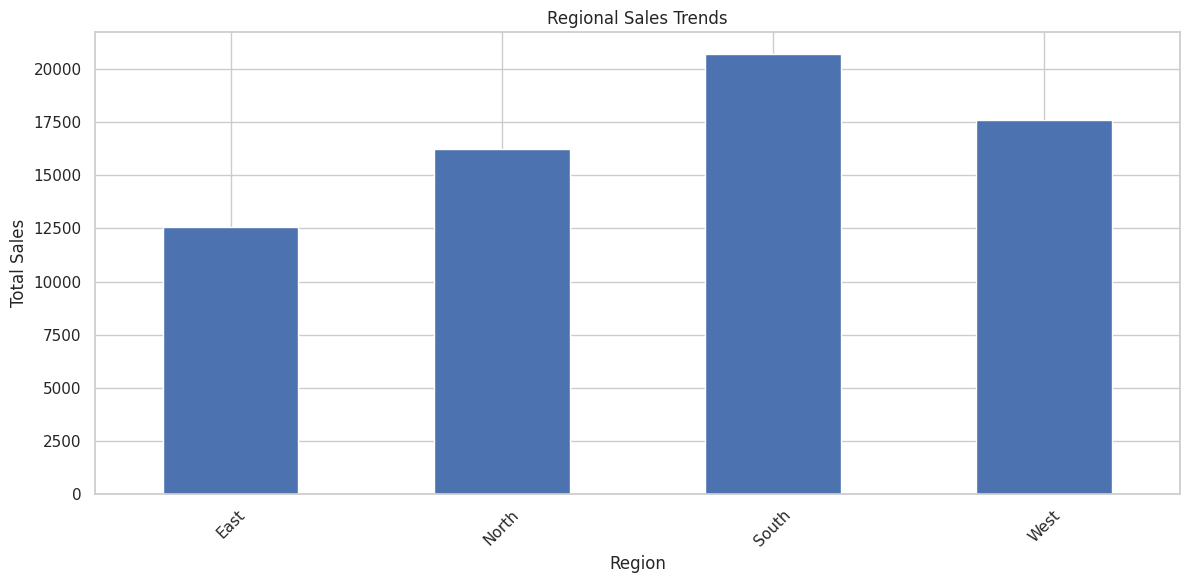

In [68]:
# Regional sales trends plot.

plt.figure(figsize=(14, 6))
regional_sales.plot(kind='bar')
#plt.plot(regional_sales.index, regional_sales.values)
plt.title('Regional Sales Trends')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [69]:
# Detect seasonal variations or anomalies (e.g., unusually high/low months)

monthly_avg = monthly_sales.mean()

monthly_std = monthly_sales.std()

anomalies = monthly_sales[(monthly_sales > monthly_avg + 2 * monthly_std) |

                          (monthly_sales < monthly_avg - 2 * monthly_std)]


In [70]:
# Compile trend analysis

trend_analysis = {

    "Monthly Sales Trends": monthly_sales.to_dict(),

    "Quarterly Sales Trends": quarterly_sales.to_dict(),

    "Regional Sales Trends": regional_sales.to_dict(),

    "Seasonal Anomalies": anomalies.to_dict(),
}

trend_analysis

{'Monthly Sales Trends': {Period('2024-01', 'M'): 24529.01000785234,
  Period('2024-02', 'M'): 15735.326161761708,
  Period('2024-03', 'M'): 21702.574217759095,
  Period('2024-04', 'M'): 5088.791797123769},
 'Quarterly Sales Trends': {Period('2024Q1', 'Q-DEC'): 61966.910387373144,
  Period('2024Q2', 'Q-DEC'): 5088.791797123769},
 'Regional Sales Trends': {'East': 12555.908945594605,
  'North': 16219.576469761854,
  'South': 20680.062666731854,
  'West': 17600.154102408596},
 'Seasonal Anomalies': {}}

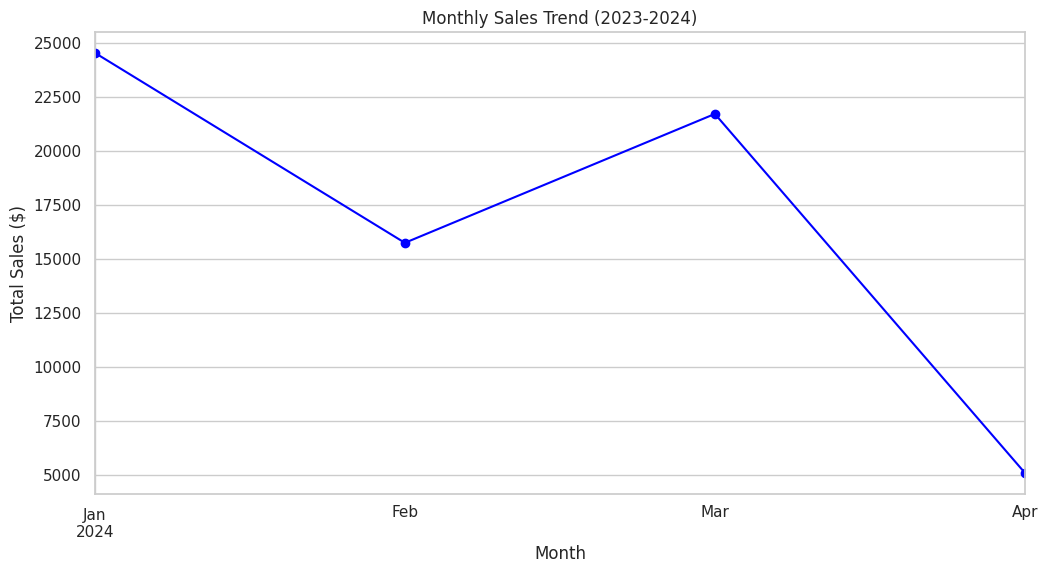

In [71]:
import matplotlib.pyplot as plt

# Plot monthly sales to identify trends and anomalies
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='blue', title='Monthly Sales Trend (2023-2024)')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

In [72]:
monthly_sales

,Total_Sales
Month,
2024-01,24529.010008
2024-02,15735.326162
2024-03,21702.574218
2024-04,5088.791797


In [73]:
# Identify any significant deviations from the mean
sales_mean = monthly_sales.mean()
sales_std = monthly_sales.std()
anomalies = monthly_sales[(monthly_sales > sales_mean + 2 * sales_std) | (monthly_sales < sales_mean - 2 * sales_std)]


In [74]:
sales_mean, sales_std

(16763.92554612423, 8603.362756313616)

In [75]:
anomalies

,Total_Sales
Month,


# **Customer Segmentation:**

In [76]:
from datetime import datetime

recent_date = filtered_data['Order_Date'].max()

# Calculate the number of days since the last order for each customer

rfm = filtered_data.groupby('Customer_ID').agg({

    'Order_Date': lambda x: (recent_date - x.max()).days,

    'Order_ID': 'count',

    'Total_Sales': 'sum'

})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, duplicates='drop')
rfm['F_Score'] = rfm['F_Score'].cat.codes + 1

rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [77]:
high_value_customers = rfm[rfm['RFM_Score'].isin(rfm['RFM_Score'].unique()[:int(0.2 * len(rfm))])]

high_value_customers

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
Customer_ID,,,,,,,
1000,2,1,275.522710,5,1,1,511
1001,34,4,3827.862194,3,3,5,335
1002,62,2,682.924606,2,1,3,213
1003,31,3,995.669063,3,2,3,323
1005,33,1,420.984867,3,1,1,311
1006,0,3,1588.121108,5,2,4,524
1007,19,3,1074.851234,4,2,3,423
1008,51,2,928.980325,2,1,3,213
1009,25,1,410.844483,3,1,1,311


In [78]:
# Aggregate data by Customer_ID
customer_data = Sales_df.groupby('Customer_ID').agg({
    'Total_Sales': 'sum',  # Total revenue per customer
    'Order_ID': 'count',   # Number of purchases (frequency)
    'Price_Per_Unit': 'mean',  # Average spend per product
    'Region': 'first',      # Region as demographic
    'Customer_Segment': 'first',  # Existing segment
    'Product_Category': lambda x: x.mode()[0]  # Most common product category
}).reset_index()


In [79]:
# Rename aggregated columns for clarity
customer_data.rename(columns={
    'Order_ID': 'Frequency',
    'Total_Sales': 'Monetary',
    'Price_Per_Unit': 'Average_Spend',
    'Product_Category': 'Top_Category'
}, inplace=True)

# Display the processed customer-level data
customer_data

,Customer_ID,Monetary,Frequency,Average_Spend,Region,Customer_Segment,Top_Category
0,1000,275.522710,1,68.880677,North,Returning,Clothing
1,1001,3827.862194,4,322.273739,South,VIP,Clothing
2,1002,682.924606,2,91.230534,North,New,Electronics
3,1003,995.669063,3,263.748329,West,New,Groceries
4,1005,420.984867,1,105.246217,East,VIP,Electronics
5,1006,1588.121108,3,175.346702,West,VIP,Furniture
6,1007,1074.851234,3,127.954369,South,Returning,Furniture
7,1008,928.980325,2,305.656031,East,Returning,Furniture
8,1009,410.844483,1,205.422242,North,Returning,Groceries
9,1010,2560.162213,2,426.693702,South,VIP,Books


In [80]:
# Select numeric features for clustering

features = customer_data[['Monetary', 'Frequency', 'Average_Spend']]

In [81]:
from sklearn.preprocessing import StandardScaler

# Normalized the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

In [82]:
from sklearn.cluster import KMeans

# Performed K-Means clustering (with k=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
customer_data['Cluster'] = kmeans.fit_predict(normalized_features)

# Analyzed the clusters
cluster_summary = customer_data.groupby('Cluster').agg({
    'Monetary': ['mean', 'sum'],
    'Frequency': 'mean',
    'Average_Spend': 'mean',
    'Customer_ID': 'count',
    'Region': lambda x: x.mode()[0],
    'Top_Category': lambda x: x.mode()[0]
}).reset_index()

cluster_summary.columns = ['Cluster', 'Avg_Monetary', 'Total_Monetary', 'Avg_Frequency',
                           'Avg_Average_Spend', 'Customer_Count', 'Dominant_Region', 'Top_Category']
cluster_summary.sort_values(by='Avg_Monetary', ascending=False)


,Cluster,Avg_Monetary,Total_Monetary,Avg_Frequency,Avg_Average_Spend,Customer_Count,Dominant_Region,Top_Category
1,1,3836.188017,34525.692150,3.777778,319.974084,9,West,Clothing
2,2,1336.139643,12025.256788,1.666667,316.386498,9,South,Electronics
3,3,1280.125767,11521.131907,3.222222,159.707922,9,South,Furniture
0,0,472.822176,8983.621339,1.157895,127.419461,19,East,Groceries


# **Visualization:**

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

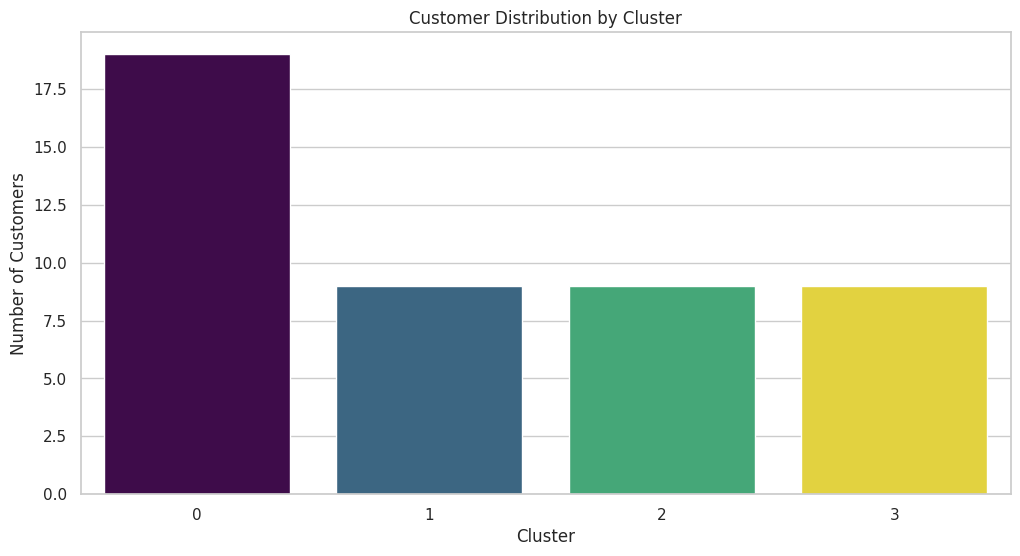

In [84]:
#Cluster Distribution (Number of Customers per Cluster)

plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster', hue='Cluster', data=customer_data, palette='viridis', legend=False)
plt.title('Customer Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

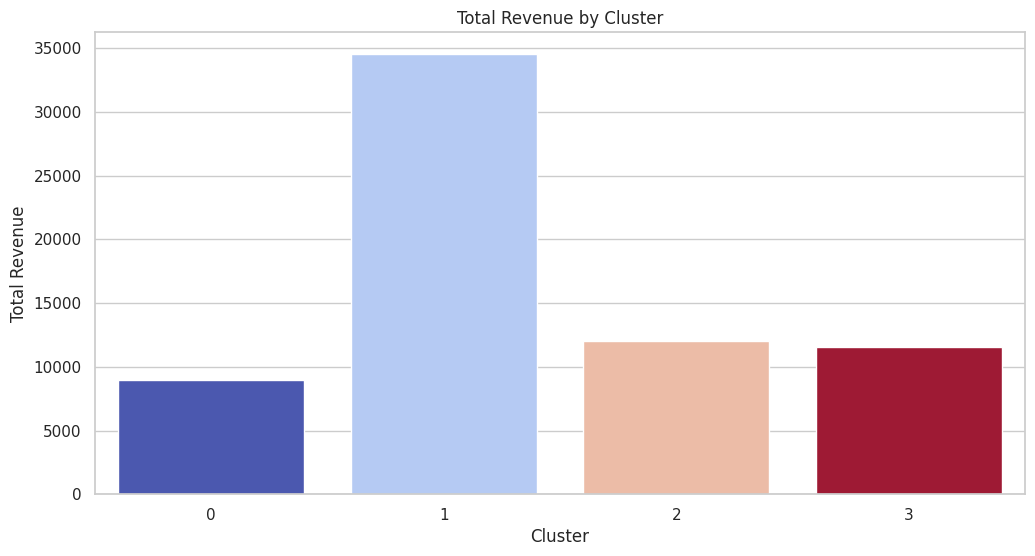

In [85]:
# Revenue by Cluster (Total Monetary Value)

plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='Total_Monetary', hue='Cluster', data=cluster_summary, palette='coolwarm', legend=False)
plt.title('Total Revenue by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Revenue')
plt.show()

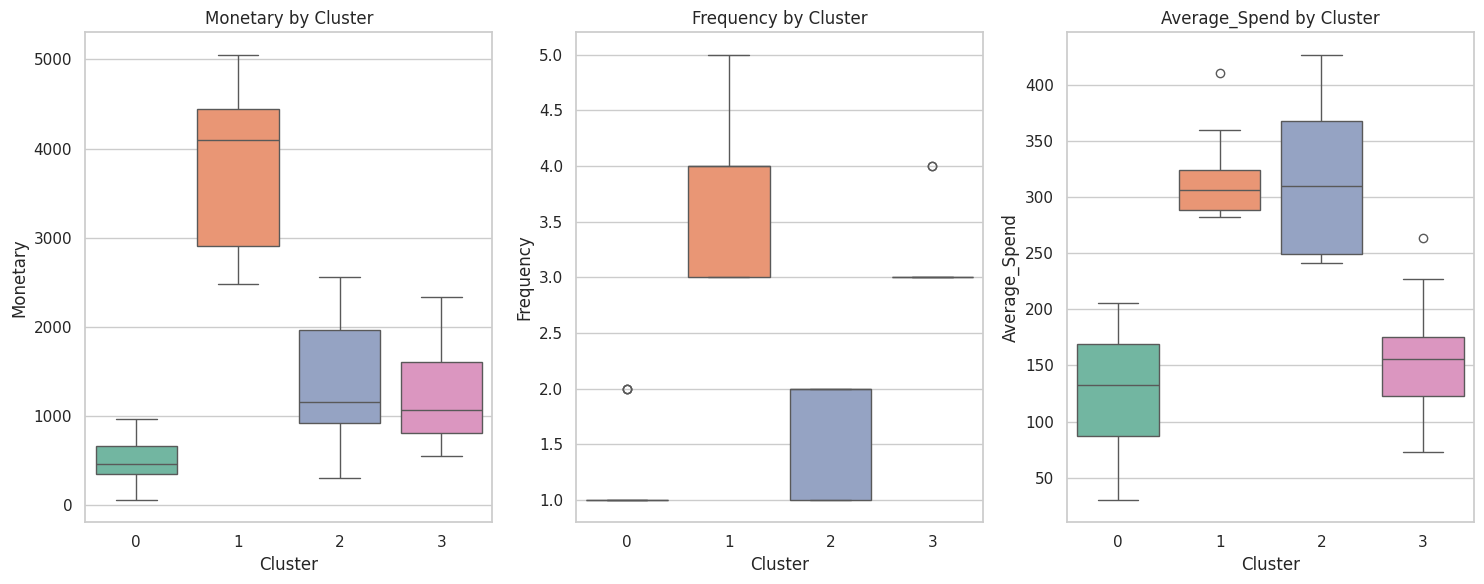

In [86]:
# Spending Patterns (Boxplot for Monetary, Frequency, and Average Spend)

plt.figure(figsize=(15, 6))

for i, col in enumerate(['Monetary', 'Frequency', 'Average_Spend'], start=1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Cluster', y=col, hue='Cluster', data=customer_data, palette='Set2', legend=False)
    plt.title(f'{col} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

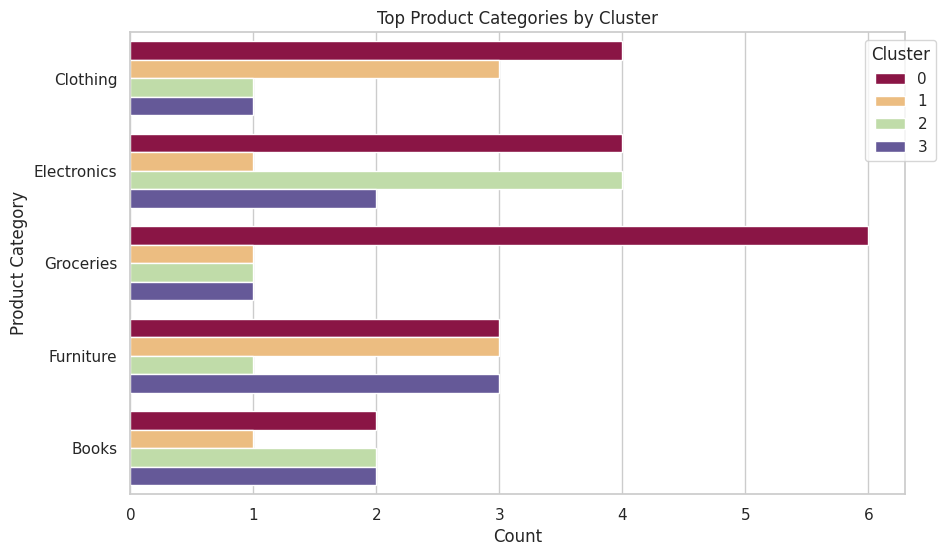

In [87]:
# Top Category per Cluster (Bar Chart)

plt.figure(figsize=(10, 6))

sns.countplot(y='Top_Category', hue='Cluster', data=customer_data, palette='Spectral', dodge=True)
plt.title('Top Product Categories by Cluster')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1))
plt.show()

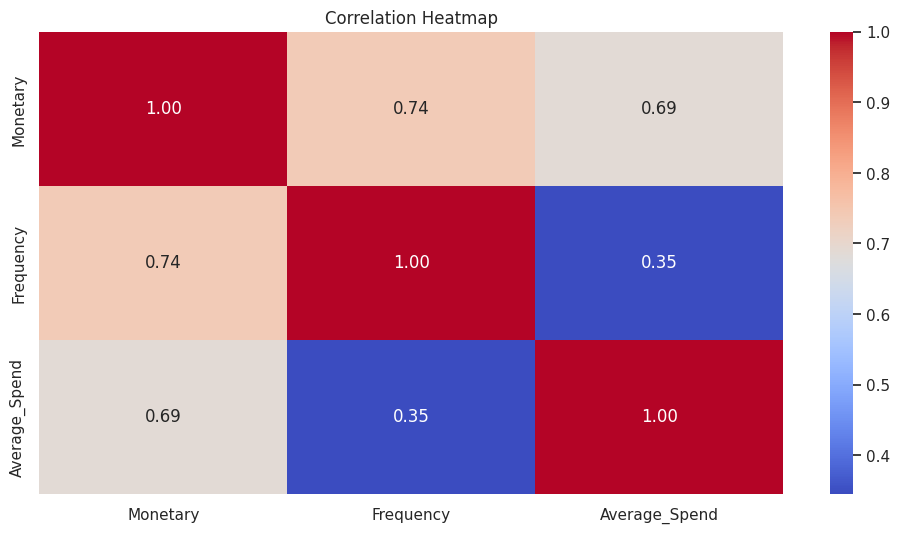

In [88]:
#  showing the dominant regions for each cluster.

plt.figure(figsize=(12, 6))
correlation_matrix = customer_data[['Monetary', 'Frequency', 'Average_Spend']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# **Recommendations:**


Based on the customer segmentation analysis, here are 5 actionable strategies to enhance sales performance:

1.Target High-Value Customers (Cluster 1)

Characteristics: High revenue and high purchase frequency; dominant in the Clothing category.

Strategy:

* Implement loyalty programs with tiered rewards to encourage repeat purchases.   

* Offer exclusive early access to new products or premium collections.

* Leverage personalized marketing campaigns highlighting premium Clothing products.

* Host VIP events or provide concierge shopping services for these top customers.
---

2.Boost Repeat Purchases in Cluster 3 (Moderate Revenue, High Spend)

Characteristics: Moderate revenue but high average spending; dominant in Electronics.

Strategy:

* Introduce bundled discounts or subscriptions for complementary Electronics items.

*    Use email marketing to remind these customers of new arrivals or accessory upgrades.

*   Provide incentives like “Buy More, Save More” promotions to increase purchase frequency.
---

3.Engage Steady Buyers (Cluster 2)

Characteristics: Moderate revenue with frequent purchases across diverse categories.

Strategy:

* Use cross-selling techniques to introduce products from lesser-purchased categories.
*  Develop campaigns tailored to seasonal or occasion-based products.

*   Offer bundle promotions or discounts on products from different categories.

*   Launch “recommendation engines” on your e-commerce platform to highlight products based on their preferences.
---

4.Improve Engagement with Low-Value Customers (Cluster 0)

Characteristics: Low revenue and engagement; dominant in Groceries.

Strategy:

*   Offer limited-time promotions on frequently purchased items to encourage bulk buying.

*   Introduce referral programs to encourage them to bring in new customers.

*   Implement retention campaigns, such as personalized emails with discount codes.

*   Analyze barriers to higher spending (e.g., pricing, variety, or ease of purchase) and address them directly.
---

5.Leverage Regional Insights

Characteristics: Different clusters are dominant in specific regions.

Strategy:

*  Deploy region-specific marketing campaigns (e.g., highlight electronics for the South).

*  Optimize inventory to align with regional demand and top categories.

*  Collaborate with local influencers or host community events in high-performing regions.
---